# H1C IDR3.2 Cross-Power Spectra
Inspect cross-power spectra.

In [1]:
import h5py
import numpy as np

from ipywidgets import interact

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# configure matplotlib
mpl.style.use("classic")

import sys
sys.path.append("/users/pkeller/code/ClosurePhaseAnalysis/")
from library import dspec

In [3]:
# data path
path = "/lustre/aoc/projects/hera/pkeller/data/H1C_IDR3.2/sample/EQ14_FC_B2_XPS.h5"

# load data
with h5py.File(path, "r") as f:
    delay = f["delay"][()]
    lst = f["LST"][()]
    xps_avg = f["XPS AVG"][()]
    xps_xx = f["XPS XX"][()]
    xps_yy = f["XPS YY"][()]
    xps_xx_avg = f["XPS XX AVG"][()]
    xps_yy_avg = f["XPS YY AVG"][()]
    xps_xx_intra = f["xps intra-JD XX"][()]
    xps_yy_intra = f["XPS YY INTRA"][()]
    err_avg = f["ERR AVG"][()]
    err_xx = f["ERR XX"][()]
    err_yy = f["ERR YY"][()]
    err_xx_avg = f["ERR XX AVG"][()]
    err_yy_avg = f["ERR YY AVG"][()]
    err_xx_intra = f["ERR XX INTRA"][()]
    err_yy_intra = f["ERR YY INTRA"][()]
    w_xx = f["weights XX"][()]
    w_yy = f["weights YY"][()]
    A = f["scaling"][()]

print(xps_xx_intra.shape)

(77, 77, 47, 161)


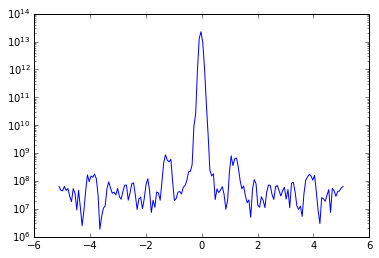

In [7]:
delay = dspec.delay(n=xps_xx.shape[-1])
plt.plot(delay, np.abs(xps_xx[0, 0, 0]))
plt.yscale("log")

In [56]:
# compute average over offdiagonal triad pairs (inter triad)
xps_xx_wf = (np.moveaxis(xps_xx, -1, 0) * w_xx).sum(axis=(1, 2)) / w_xx.sum(axis=(0, 1))
xps_yy_wf = (np.moveaxis(xps_yy, -1, 0) * w_yy).sum(axis=(1, 2)) / w_yy.sum(axis=(0, 1))
err_xx_wf = (np.moveaxis(err_xx, -1, 0) * w_xx).sum(axis=(2, 3)) / w_xx.sum(axis=(0, 1))
err_yy_wf = (np.moveaxis(err_yy, -1, 0) * w_yy).sum(axis=(2, 3)) / w_yy.sum(axis=(0, 1))

# compute average over polarisaions
w1 = 1 / np.median(np.abs(err_xx_wf)**2)
w2 = 1 / np.median(np.abs(err_yy_wf)**2)
xps_wf = (w1 * xps_xx_wf + w2 * xps_yy_wf) / (w1 + w2)
xps_wf = xps_wf.swapaxes(0, 1)

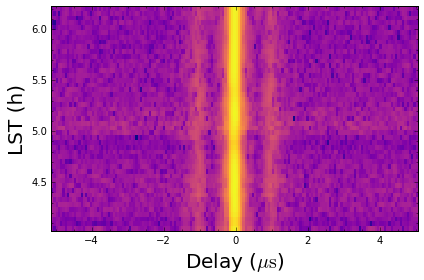

In [130]:
im = plt.imshow(
    np.flip(np.abs(xps_wf.real), axis=0),
    extent=(np.amin(delay), np.amax(delay), np.amin(lst), np.amax(lst)),
    cmap=cm.plasma,
    interpolation="None",
    aspect="auto",    
    norm=mpl.colors.LogNorm()
)
    
plt.xlabel(r"Delay ($\mu\mathrm{s}$)")
plt.ylabel("LST (h)")
plt.ylim([min(lst), max(lst)])
plt.minorticks_on()
plt.tight_layout()
plt.show()

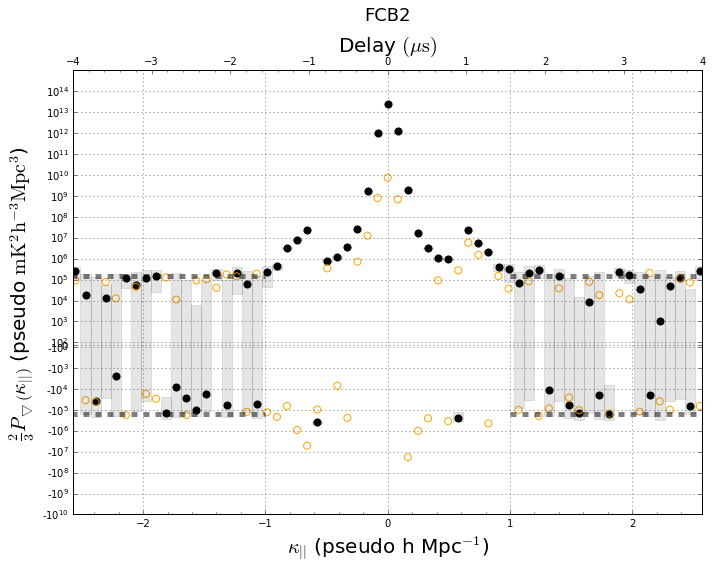

In [131]:
delay=dspec.delay(n=xps_xx_avg.shape[-1])
dspec.power_plot(
    delay,
    xps_xx_avg, 
    err_xx_avg,
    linthresh=1e3,
    legend=False,
    onesided=False,
    title="FCB2",
)

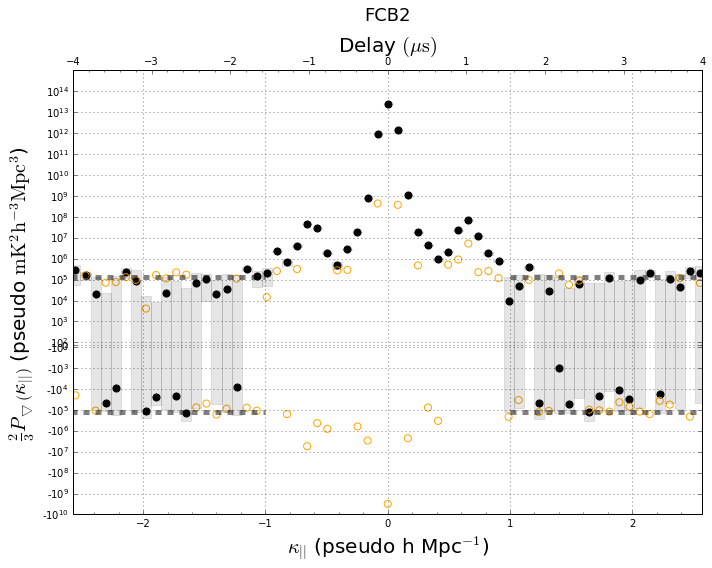

In [31]:
dspec.power_plot(
    delay,
    xps_yy_avg, 
    err_yy_avg,
    linthresh=1e3,
    legend=False,
    onesided=False,
    title="FCB2",
)

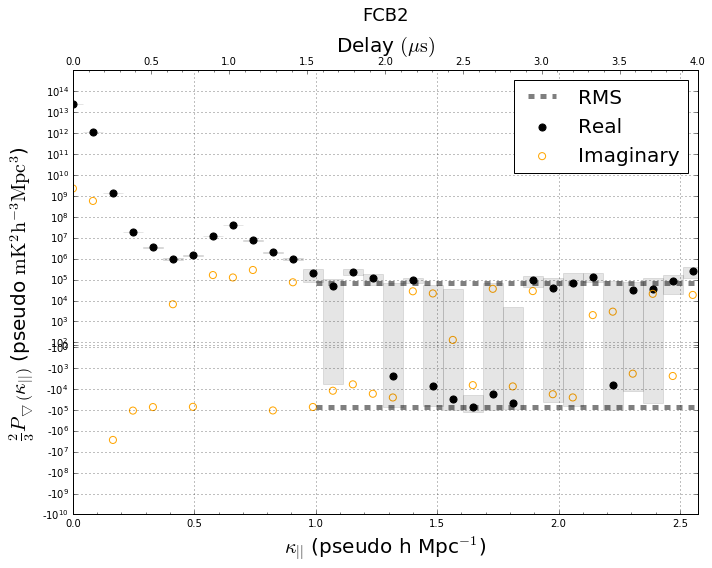

In [11]:
dspec.power_plot(
    delay,
    xps_avg, 
    err_avg,
    linthresh=1e3,
    legend=True,
    onesided=True,
    title="FCB2",
)

In [10]:
print(np.median(err_avg[np.where(np.abs(delay)>2)].real) / np.sqrt(2))

74794.58496866548
